In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_excel('Netflix Dataset.xlsx', sheet_name='in')

print("Original shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)


Original shape: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Data types:
Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object


In [ ]:
# Data Cleaning

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Clean column names - remove spaces and special characters
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Handle missing values
df['director'] = df['director'].fillna('Unknown Director')
df['cast'] = df['cast'].fillna('Unknown Cast')
df['country'] = df['country'].fillna('Unknown Country')
df['rating'] = df['rating'].fillna('Not Rated')

# Clean text columns - remove extra spaces
text_columns = ['title', 'director', 'cast', 'country', 'type', 'description']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].str.strip()

# Fix date format issues in release_date
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Clean duration column - extract numbers and standardize format
df['duration_clean'] = df['duration'].str.extract(r'(\d+)').astype(float)  
df['duration_unit'] = df['duration'].str.extract(r'(min|Season|Seasons)')  

# Remove duplicates
df = df.drop_duplicates(subset=['show_id', 'title'], keep='first')

# Fix encoding issues in text columns
df['title'] = df['title'].str.encode('utf-8', errors='ignore').str.decode('utf-8')
df['cast'] = df['cast'].str.encode('utf-8', errors='ignore').str.decode('utf-8')


Missing values:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [44]:
print("\nAfter cleaning:")
print("Shape:", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())



After cleaning:
Shape: (7787, 13)

Missing values after cleaning:
show_id            0
category           0
title             19
director           0
cast               0
country            0
release_date      10
rating             0
duration           0
type               0
description        0
duration_clean     0
duration_unit      0
dtype: int64


In [45]:
print("\nFirst few rows:")
print(df.head())



First few rows:
  show_id category title           director  \
0      s1  TV Show   NaN   Unknown Director   
1      s2    Movie   NaN  Jorge Michel Grau   
2      s3    Movie   NaN       Gilbert Chan   
3      s4    Movie   NaN        Shane Acker   
4      s5    Movie   NaN     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  release_date rating   duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                type  \


In [46]:
# 4. Exploratory Data Analysis (EDA)

# Count of Movies vs TV Shows
print("\nCategory Distribution:")
print(df['category'].value_counts())

# Top Countries
print("\nTop 5 Countries:")
print(df['country'].value_counts().head(5))

# Rating distribution
print("\nRating Distribution:")
print(df['rating'].value_counts())


Category Distribution:
category
Movie      5377
TV Show    2410
Name: count, dtype: int64

Top 5 Countries:
country
United States      2555
India               923
Unknown Country     507
United Kingdom      397
Japan               226
Name: count, dtype: int64

Rating Distribution:
rating
TV-MA        2863
TV-14        1931
TV-PG         806
R             665
PG-13         386
TV-Y          280
TV-Y7         271
PG            247
TV-G          194
NR             84
G              39
Not Rated       7
TV-Y7-FV        6
UR              5
NC-17           3
Name: count, dtype: int64


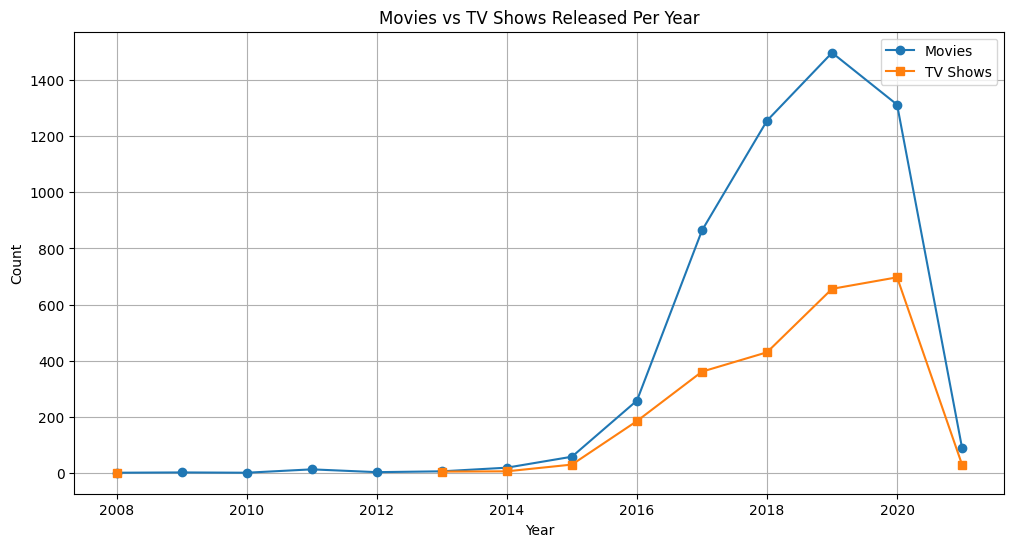

In [47]:
# 5. Analysis & Visualizations
# 1. Line Chart – Movies vs. TV Shows released per year
yearly_data = df.groupby([df['release_date'].dt.year, 'category']).size().unstack()
plt.figure(figsize=(12,6))
plt.plot(yearly_data.index, yearly_data['Movie'], label='Movies', marker='o')
plt.plot(yearly_data.index, yearly_data['TV Show'], label='TV Shows', marker='s')
plt.title('Movies vs TV Shows Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


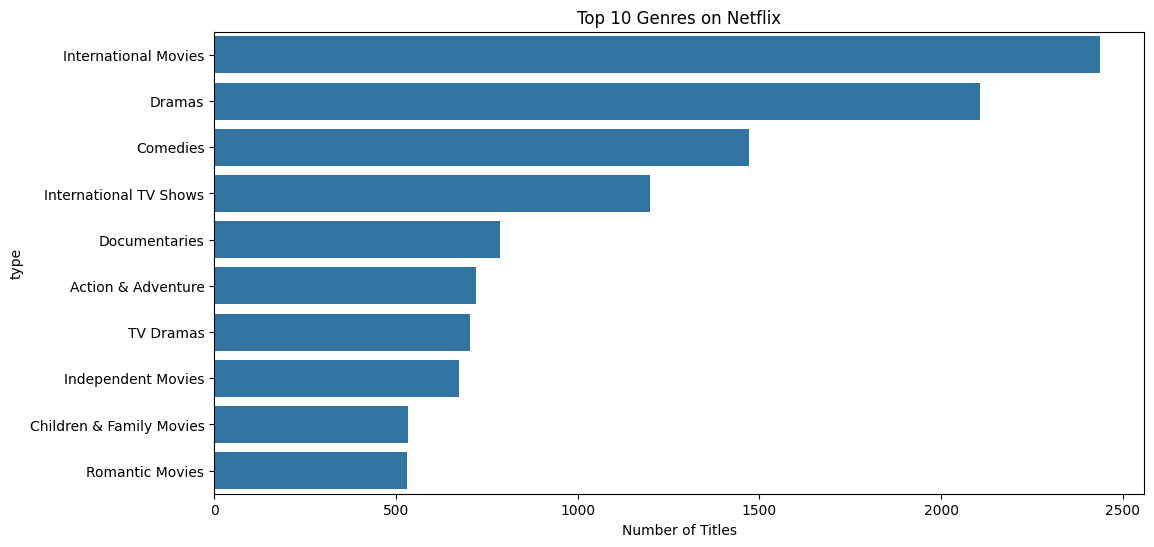

In [48]:
# 2. Bar Chart – Top 10 Genres
all_genres = df['type'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()


<Figure size 1200x600 with 0 Axes>

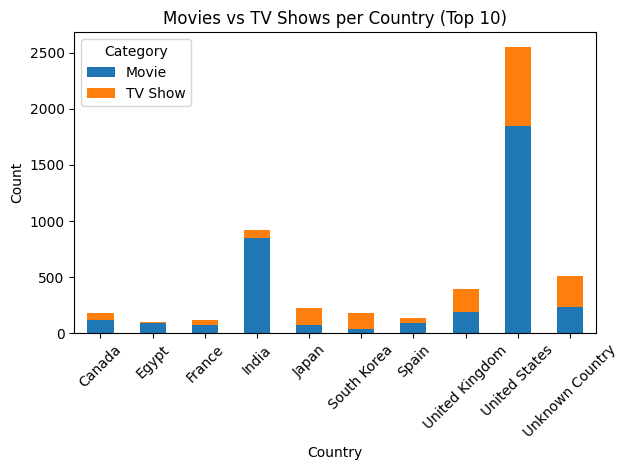

In [49]:
# 3. Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['country'].value_counts().head(10).index
country_data = df[df['country'].isin(top_countries)]
stacked_data = country_data.groupby(['country', 'category']).size().unstack()

plt.figure(figsize=(12,6))
stacked_data.plot(kind='bar', stacked=True)
plt.title('Movies vs TV Shows per Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

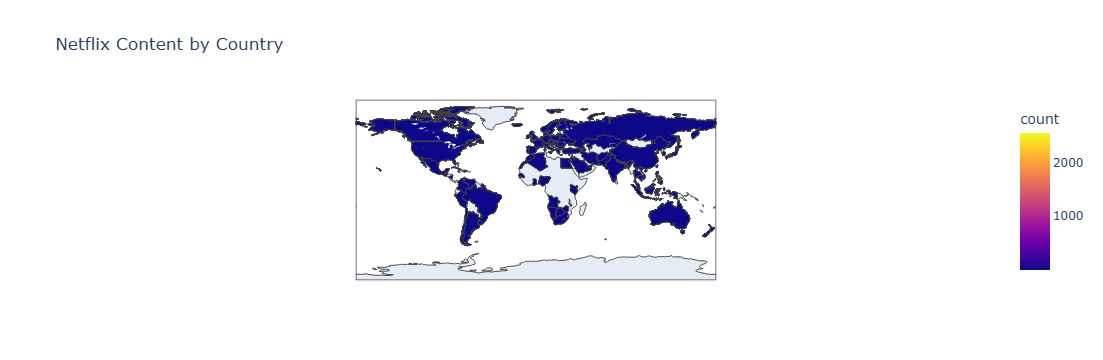

In [50]:
# 4. Choropleth Map – Country-wise Content
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
fig = px.choropleth(country_counts, locations="country", locationmode="country names",
                    color="count", title="Netflix Content by Country")
fig.show()

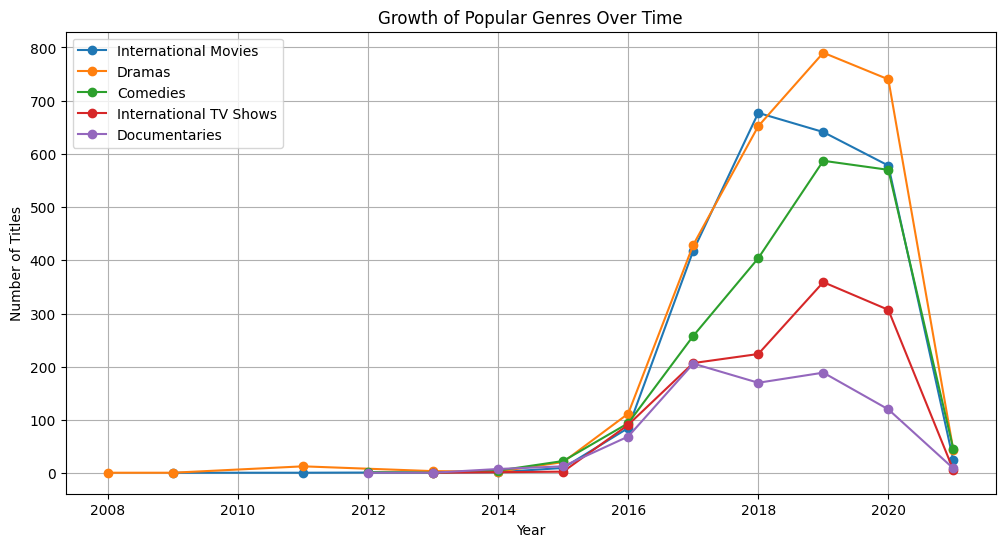

In [51]:
# 5. Trend Line – Growth of Popular Genres Over Time
top_5_genres = all_genres.value_counts().head(5).index
plt.figure(figsize=(12,6))
for genre in top_5_genres:
    genre_years = df[df['type'].str.contains(genre, na=False)]
    yearly_genre = genre_years.groupby(genre_years['release_date'].dt.year).size()
    plt.plot(yearly_genre.index, yearly_genre.values, label=genre, marker='o')
plt.title('Growth of Popular Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()

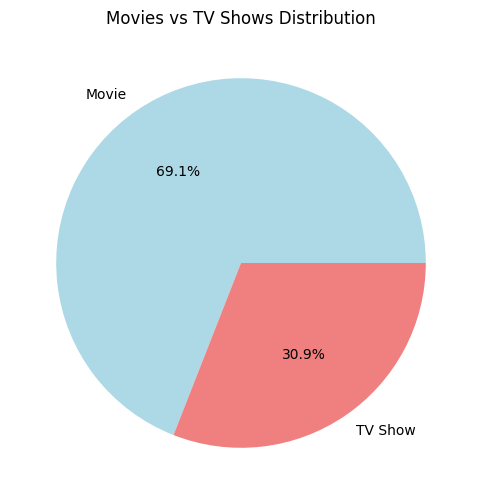

In [52]:

# 6. Pie Chart - Movies vs TV Shows
plt.figure(figsize=(8,6))
df['category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Movies vs TV Shows Distribution')
plt.ylabel('')
plt.show()

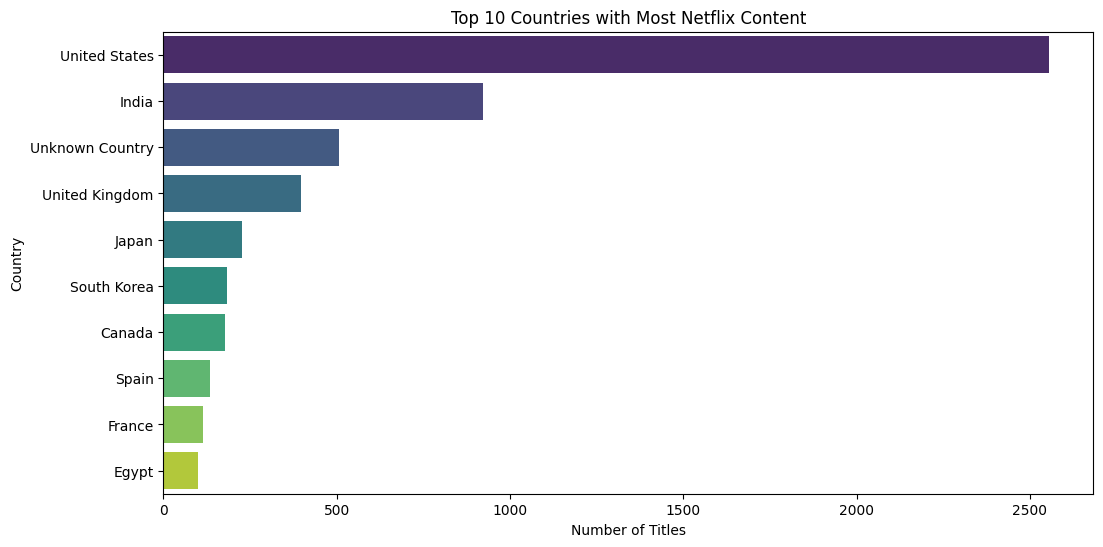

In [53]:
# 7. Bar Chart - Top 10 Countries with most content
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='viridis', legend=False)
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

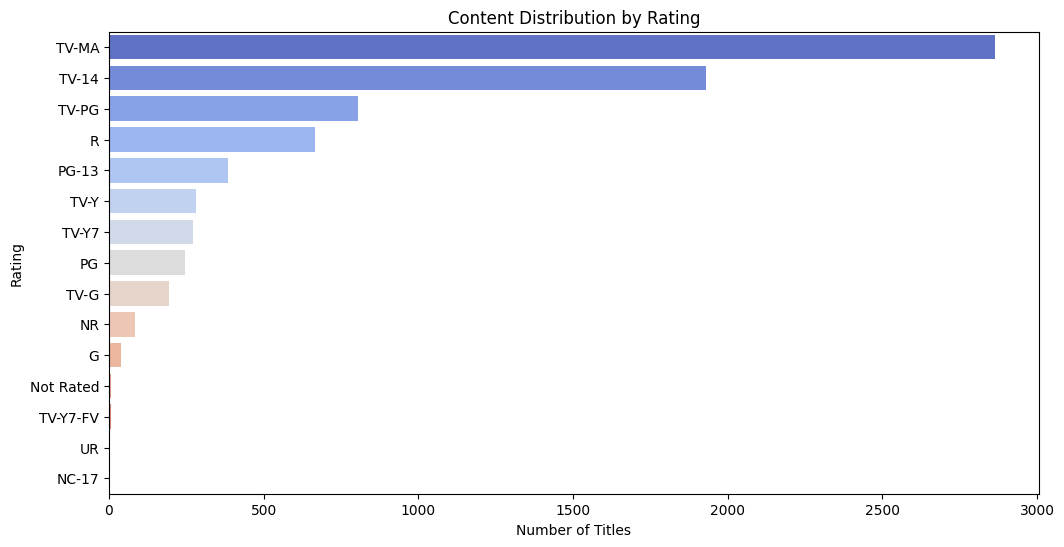

In [54]:
# 8. Bar Chart - Content by Rating
plt.figure(figsize=(12,6))
rating_counts = df['rating'].value_counts()
sns.barplot(x=rating_counts.values, y=rating_counts.index, hue=rating_counts.index, palette='coolwarm', legend=False)
plt.title('Content Distribution by Rating')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()

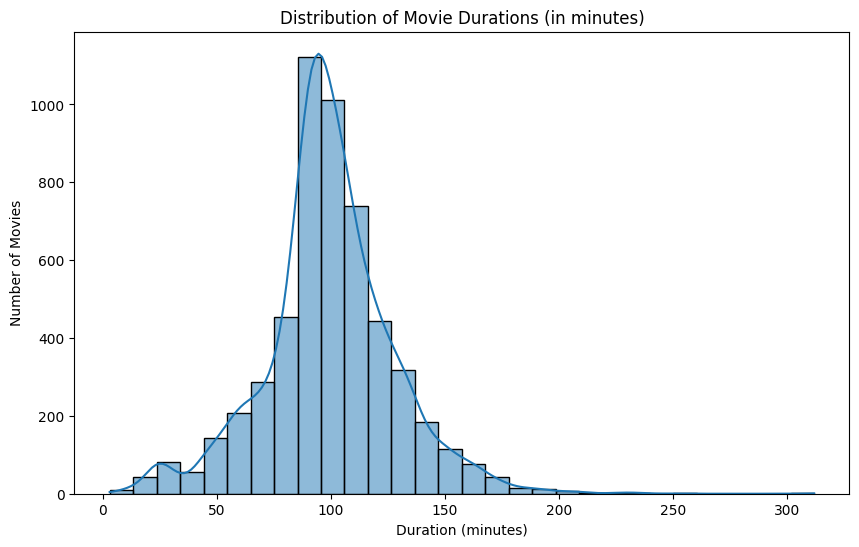

In [55]:
#9. Duration Analysis - Movies only
movies_df = df[df['category'] == 'Movie'].copy()  # Add .copy() here
movies_df['duration_numeric'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)  # Use raw string with r''

plt.figure(figsize=(10,6))
sns.histplot(movies_df['duration_numeric'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

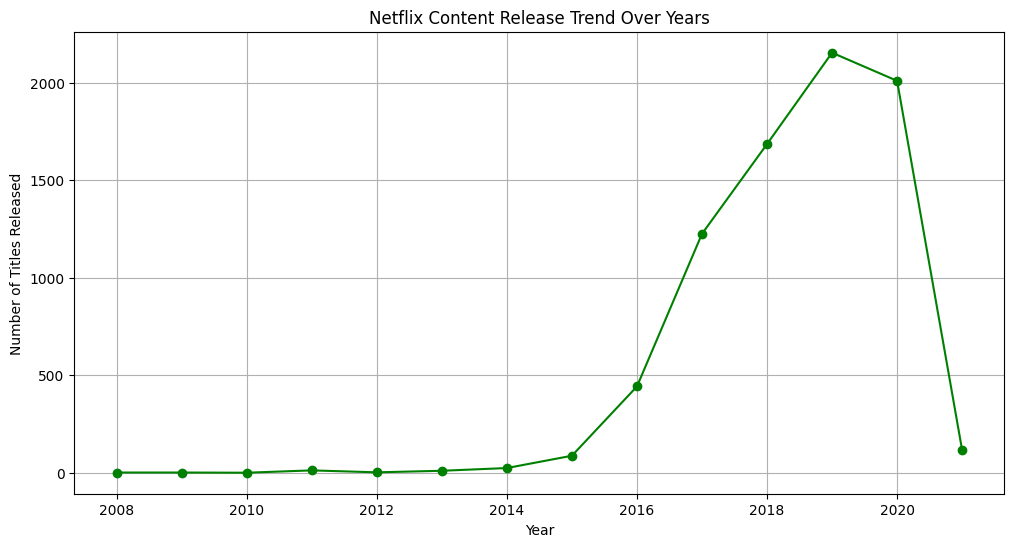

In [56]:
# 10. Release Trends Over Years
df['release_year'] = df['release_date'].dt.year
yearly_trend = df.groupby('release_year').size()

plt.figure(figsize=(12,6))
yearly_trend.plot(kind='line', marker='o', color='green')
plt.title('Netflix Content Release Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.show()

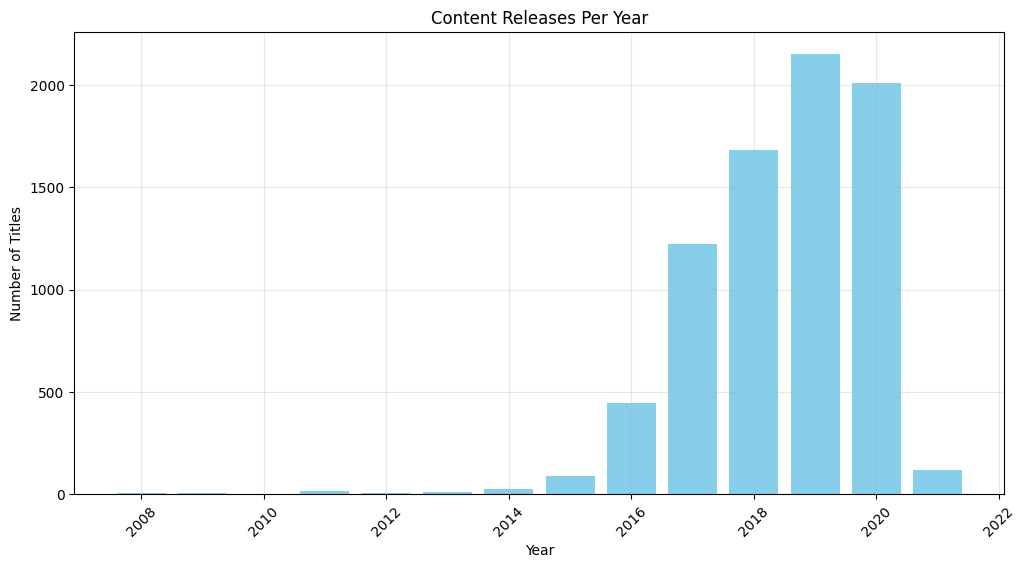

In [57]:
# 11. Which year had the most content releases?
year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.title('Content Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

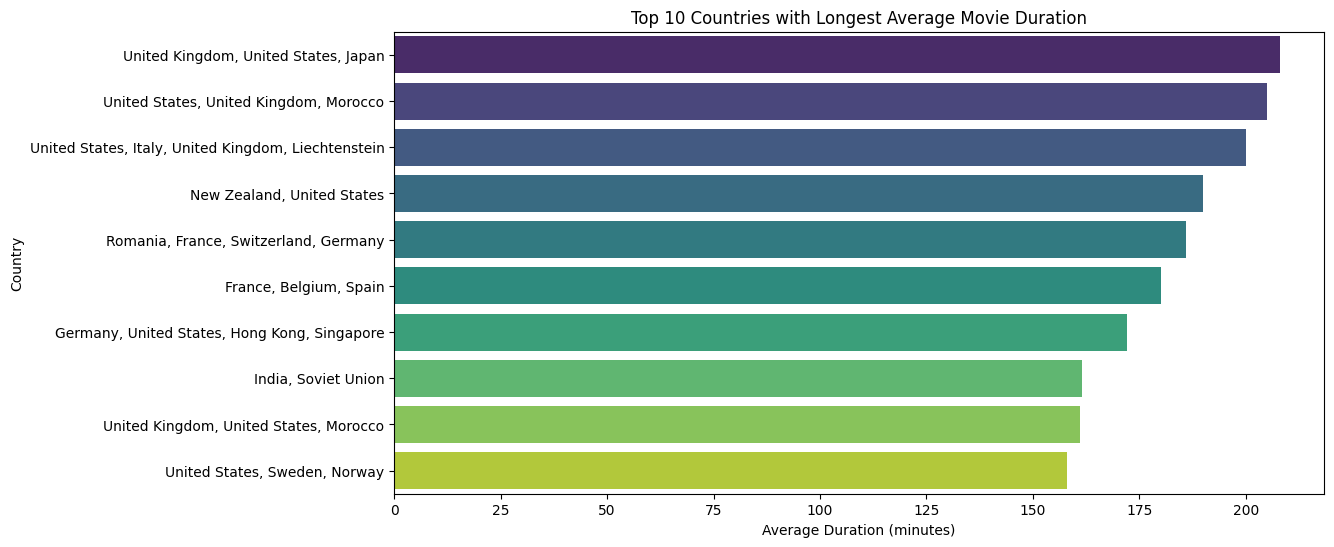

In [58]:
# 12.Top 10 countries with longest average movie duration
movies = df[df['category'] == 'Movie'].copy()
movies['duration_num'] = movies['duration'].str.extract(r'(\d+)').astype(float)

country_avg = movies.groupby('country')['duration_num'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_avg.values, y=country_avg.index, hue=country_avg.index, palette='viridis', legend=False)
plt.title('Top 10 Countries with Longest Average Movie Duration')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Country')
plt.show()